In [2]:
import pickle
import os
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import FastICA
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import nibabel as nib
import ants
from scipy.ndimage.morphology import binary_erosion
from scipy.ndimage.morphology import binary_dilation
import cv2
import bigbadbrain as bbb
import scipy
from scipy.interpolate import interp1d
from matplotlib.colors import ListedColormap
from matplotlib.pyplot import cm
import matplotlib.colors as mcolors
import matplotlib
import tqdm
import brainsss
import random
from matplotlib.colors import LinearSegmentedColormap

/home/users/brezovec/.local/lib/python3.6/site-packages/ants/viz/render_surface_function.py:16: UserWarning: Cant import Plotly. Install it `pip install chart_studio` if you want to use ants.render_surface_function
  "Cant import Plotly. Install it `pip install chart_studio` if you want to use ants.render_surface_function"


In [3]:
cluster_dir = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20221109_cluster_pca/"

In [3]:
### OLDER FILTERS, BASED ON AVERAGING SUPERVOXEL FILTERS
filters = np.load(os.path.join(cluster_dir,'20221122_temporal_filters.npy'))
filters = np.reshape(filters,(501,4,500))
filters.shape
### get peaks
peaks = np.argmax(filters,axis=-1)
print(peaks.shape)

(501, 4)


In [4]:
peaks_old = peaks.copy()

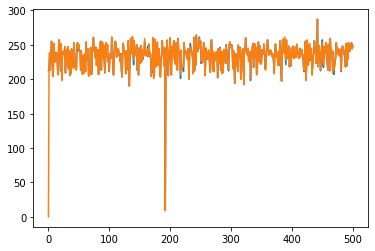

In [19]:
plt.plot(peaks[:,0])
plt.plot(peaks_old[:,0])

In [5]:
### NEWER FILTERS, BASED ON AVERAGING SUPERVOXELS AND RECOMPUTING FILTER
filters = np.load(os.path.join(cluster_dir,'20230202_SC_temporal_filters.npy'))
#filters = np.load(os.path.join(cluster_dir,'20230420_SC_temporal_filters.npy'))
#filters = np.load(os.path.join(cluster_dir,'20230421_SC_temporal_filters.npy')) #re-z-score version

print(filters.shape)
### get peaks
peaks = np.argmax(filters,axis=-1)
print(peaks.shape)

(501, 4, 500)
(501, 4)


In [6]:
break_points[26]

NameError: name 'break_points' is not defined

In [7]:
#500 samples fof 10sec. 50 for 1 sec

1

In [ ]:
         138, 113,  16,  10,  69,  72, 162,  26, 178, 200,  43,   7,  71,
       157, 154,  78,  90, 122, 232, 123,  82, 189, 212, 248, 121, 134,
    
    106, 173, 129,  66,   4, 135,  25, 247,  63,  40, 240,  91, 103,
       144,  93,  73,  60, 179,   6, 146,  22,  54,  19, 102,   1, 166,
       101,  51,  95]

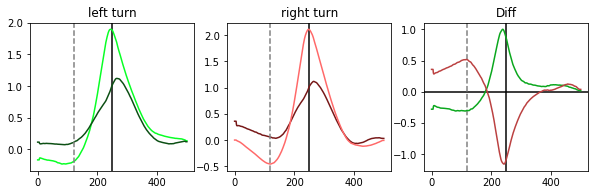

In [10]:
#cluster = #239#223#147#27#113
#cluster = 27#239#147#27#113
cluster = 77#212#173#132#121#106#92#82#71#68#31

# late filter options
#113
#26
#7
#71
#154
#122
#123 #
#212
#25 #best?
#247
#54
#102
#219

plt.figure(figsize=(10,6))

plt.subplot(231)
plt.title("left turn")
plt.axvline(250,color='k')
plt.plot(filters[cluster,1,::-1],label='Ipsi',color='#08FF25')
plt.plot(filters[cluster+250,1,::-1],label='Contra',color='#0C4F14')
plt.axvline(120,color='grey',linestyle='--')
#plt.legend()
#plt.ylim(-.4,2.8)

plt.subplot(232)
plt.title("right turn")
plt.axvline(250,color='k')
plt.plot(filters[cluster,2,::-1],label=cluster,color='#771818')
plt.plot(filters[cluster+250,2,::-1],label=cluster+250,color='#FF6969')
plt.axvline(120,color='grey',linestyle='--')
#plt.legend()
#plt.ylim(-.4,2.8)

plt.subplot(233)
plt.title("Diff")
plt.axhline(0,color='k')
plt.axvline(250,color='k')
plt.axvline(120,color='grey',linestyle='--')
plt.plot(filters[cluster,1,::-1]-filters[cluster+250,1,::-1],label='left turn',color='#0AA71D')
plt.plot((filters[cluster,2,::-1]-filters[cluster+250,2,::-1]),label='right turn',color='#BB4141')
#plt.legend()

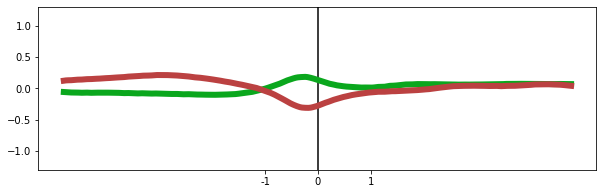

In [25]:
cluster = 57#77#25

plt.figure(figsize=(10,3))
#plt.title("left turn")
plt.axvline(240,color='k')
# plt.plot(filters[cluster,1,::-1][10:-10],label='Ipsi',color='#08FF25',lw=6)
# plt.plot(filters[cluster+250,1,::-1][10:-10],label='Contra',color='#0C4F14',lw=6)

# plt.plot(filters[cluster,2,::-1][10:-10],label=cluster,color='#771818',lw=6)
# plt.plot(filters[cluster+250,2,::-1][10:-10],label=cluster+250,color='#FF6969',lw=6)

plt.plot((filters[cluster,1,::-1]-filters[cluster+250,1,::-1])[10:-10],label='left turn',color='#0AA71D',lw=6)
plt.plot((filters[cluster,2,::-1]-filters[cluster+250,2,::-1])[10:-10],label='right turn',color='#BB4141',lw=6)

#plt.axvline(120,color='grey',linestyle='--')
#plt.legend()
#plt.ylim(-.6,2.3)
plt.ylim(-1.3,1.3)

plt.xticks([190,240,290],[-1,0,1])

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, f'{timestr}')
#plt.savefig(fname,dpi=300,bbox_inches='tight',transparent=True)

In [27]:
len(filters[cluster,1,::-1]-filters[cluster+250,1,::-1])

500

In [ ]:
# 250 is 0
# 200 is -1 sec
# 150 is -2 sec
# 100 is -3 sec
# 50 is -4 sec
# 0 is -5 sec

using 0 point


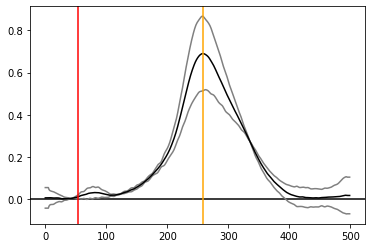

In [4]:
r_thresh = .5
derivative_thresh = 0.001

cluster = 246

a = filters[cluster,1,::-1]-filters[cluster+250,1,::-1]
b = (filters[cluster,2,::-1]-filters[cluster+250,2,::-1])*-1

r,_ = scipy.stats.pearsonr(a,b)

# if r < r_thresh:
#     continue



plt.axhline(0,color='k')
plt.plot(a,color='grey')
plt.plot(b,color='grey')
mean_trace = (a+b)/2
plt.plot(mean_trace,color='k')

peak = np.argmax(mean_trace)
plt.axvline(peak,color='orange')
above_0 = mean_trace>0.01

## if the meantrace does not cross 0 at all before the peak
# use derivative instead
if len(np.where(above_0[:peak][::-1] == False)[0])==0:
    diff = np.diff(mean_trace)
    div_break = np.where(np.diff(mean_trace)[:peak][::-1][10:] < derivative_thresh)[0][0] + 10
    breakpt = div_break
    print('using derivative')
else:
    breakpt_ = np.where(above_0[:peak][::-1] == False)[0][0]
    breakpt = peak-breakpt_
    print('using 0 point')
    
plt.axvline(breakpt,color='r')

0.8272546072120589


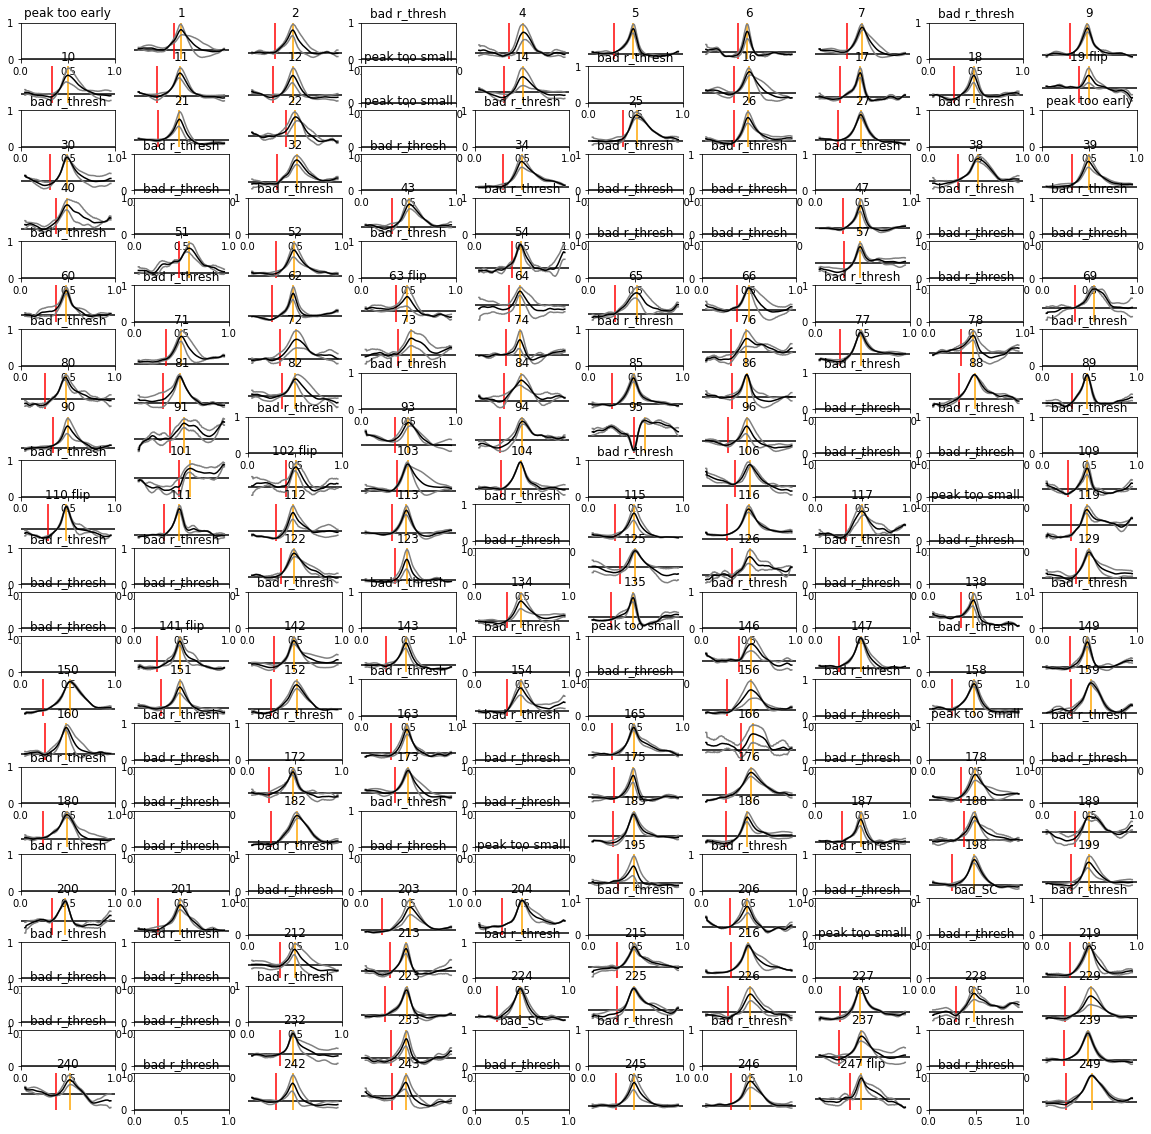

In [5]:
plt.figure(figsize=(20,20))
# use not-normalized
# filter by correlation between two samples
# define sym break by first tp !=0 that is continuous with main hump
bad_SC = [208,234] #234 not bad, but peak diff is at 0
r_thresh = .5
#derivative_thresh = 0.001 # CURRENT PAPER VALUE
derivative_thresh = 0.001


break_points = []
very_early_clusters = []
very_late_clusters = []
mean_traces = []
flipped = []
for cluster in range(250):
    flip = False
    plt.subplot(25,10,cluster+1)
    plt.axhline(0,color='k')
    
    if cluster in bad_SC:
        plt.title('bad_SC')
        break_points.append(0)
        very_early_clusters.append(0)
        very_late_clusters.append(0)
        mean_traces.append(np.zeros((500)))
        flipped.append(False)
        continue

    a = filters[cluster,1,::-1]-filters[cluster+250,1,::-1]
    b = (filters[cluster,2,::-1]-filters[cluster+250,2,::-1])*-1

    r,_ = scipy.stats.pearsonr(a,b)
    if cluster == 57:
        print(r)
    
    if r < r_thresh:
        plt.title('bad r_thresh')
        break_points.append(0)
        very_early_clusters.append(0)
        very_late_clusters.append(0)
        mean_traces.append(np.zeros((500)))
        flipped.append(False)
        continue
    
    mean_trace = (a+b)/2
    
    ### see if should flip sign for the rare few
    extreme_v = mean_trace[np.argmax(np.abs(mean_trace))]
    if extreme_v < 0:
        a*=-1; b*=-1; mean_trace*=-1
        flip=True
        flipped.append(True)
    else:
        flipped.append(False)
    
    peak = np.argmax(mean_trace[:400]) #added :400 to avoid getting late late 101 peak
    
    if peak < 10:
        plt.title('peak too early')
        break_points.append(0)
        very_early_clusters.append(0)
        very_late_clusters.append(0)
        mean_traces.append(np.zeros((500)))
        continue
        
    if np.max(mean_trace) < .1:#.1: #UPDATED
        plt.title('peak too small')
        break_points.append(0)
        very_early_clusters.append(0)
        very_late_clusters.append(0)
        mean_traces.append(np.zeros((500)))
        continue
    
    # find where derivative exceeds thresh just before peak 
    #mean_trace_norm = mean_trace/np.max(np.abs(mean_trace))
    break_div = np.where(np.diff(mean_trace)[:peak][::-1][20:] < derivative_thresh)[0][0] + 20
    break_div = peak - break_div
    
    # find where trace exceeds thresh just before peak
    above_0 = mean_trace>0.01
    try:
        break_0 = np.where(above_0[:peak][::-1] == False)[0][0]
        break_0 = peak - break_0
    except IndexError:
        break_0 = 0
    
    break_point = break_div
    break_points.append(break_point)
    #use "latest" of cross 0 and derivative thresh
#     break_point = np.max(np.asarray((break_div, break_0)))
#     break_points.append(break_point)
#     which_type = np.argmax(np.asarray((break_div, break_0)))
#     if which_type == 0:
#         color='blue'
#     if which_type == 1:
#         color='r'
        
    
    plt.axvline(peak,color='orange')
    plt.axvline(break_point,color='r')
    
    plt.plot(a,color='grey')
    plt.plot(b,color='grey')
    plt.plot(mean_trace,color='k')
    
    plt.axis('off')
    if flip is False:
        plt.title(cluster)
    else:
        plt.title(F"{cluster} flip")
        
    ### check for very early
    very_early_clusters.append(np.mean(mean_trace[:100]))
    very_late_clusters.append(np.mean(mean_trace[100:]))
    mean_traces.append(mean_trace)

In [6]:
### correct flips
for i in range(250):
    if flipped[i]:
        mean_traces[i] *= -1

In [57]:
len([  4,   5,   7,   9,  10,  11,  12,  14,  17,  18,  21,  27,  30,
        32,  34,  38,  39,  43,  47,  52,  62,  66,  69,  71,  77,  80,
        82,  85,  86,  90,  94, 104, 106, 109, 110, 111, 112, 113, 115,
       116, 126, 135, 138, 141, 142, 143, 146, 147, 149, 150, 151, 152,
       156, 158, 159, 163, 165, 172, 175, 176, 180, 182, 185, 186, 187,
       195, 198, 199, 201, 203, 204, 206, 213, 215, 216, 219, 223, 224,
       225, 226, 227, 228, 229, 232, 233, 237, 239, 240, 245, 246, 247,
       249])

92

In [56]:
np.where(np.asarray(break_points)!=0)[0]

array([  4,   5,   7,   9,  10,  11,  12,  14,  17,  18,  21,  27,  30,
        32,  34,  38,  39,  43,  47,  52,  62,  66,  69,  71,  77,  80,
        82,  85,  86,  90,  94, 104, 106, 109, 110, 111, 112, 113, 115,
       116, 126, 135, 138, 141, 142, 143, 146, 147, 149, 150, 151, 152,
       156, 158, 159, 163, 165, 172, 175, 176, 180, 182, 185, 186, 187,
       195, 198, 199, 201, 203, 204, 206, 213, 215, 216, 219, 223, 224,
       225, 226, 227, 228, 229, 232, 233, 237, 239, 240, 245, 246, 247,
       249])

In [36]:
np.where(np.asarray(break_points)!=0)[0]

array([  4,   5,   7,   9,  10,  11,  12,  14,  17,  18,  21,  27,  30,
        32,  34,  38,  39,  43,  47,  52,  62,  66,  69,  71,  77,  80,
        82,  85,  86,  90,  94, 104, 106, 109, 110, 111, 112, 113, 115,
       116, 126, 135, 138, 141, 142, 143, 146, 147, 149, 150, 151, 152,
       156, 158, 159, 163, 165, 172, 175, 176, 180, 182, 185, 186, 187,
       195, 198, 199, 201, 203, 204, 206, 213, 215, 216, 219, 223, 224,
       225, 226, 227, 228, 229, 232, 233, 237, 239, 240, 245, 246, 247,
       249])

In [7]:
cmap_early = LinearSegmentedColormap.from_list('mycmap', ['black', 'magenta'])

In [7]:
np.where(np.mean(np.asarray(mean_traces),axis=1)!=0)[0]

array([  1,   2,   4,   5,   6,   7,   9,  10,  11,  12,  14,  16,  17,
        18,  19,  21,  22,  25,  26,  27,  30,  32,  34,  38,  39,  40,
        43,  47,  51,  52,  54,  57,  60,  62,  63,  65,  66,  69,  71,
        72,  73,  76,  77,  78,  80,  82,  84,  85,  86,  88,  89,  90,
        91,  93,  94,  95, 101, 102, 103, 104, 106, 109, 110, 111, 112,
       113, 115, 116, 117, 119, 121, 122, 123, 126, 129, 134, 135, 138,
       141, 142, 143, 144, 146, 147, 149, 150, 151, 152, 154, 156, 157,
       158, 159, 162, 163, 165, 166, 172, 173, 175, 176, 178, 179, 180,
       182, 185, 186, 187, 188, 189, 195, 198, 199, 200, 201, 203, 204,
       206, 212, 213, 215, 216, 219, 223, 224, 225, 226, 227, 228, 229,
       232, 233, 237, 239, 240, 245, 246, 247, 248, 249])

In [76]:
break_points[77], break_points[68], break_points[234]

(118, 0, 0)

In [10]:
cmap=parula

In [34]:
vmin=0,vmax=120

(0.2422, 0.1504, 0.6603, 1.0)

In [12]:
for_color = [(200-i)/100 for i in break_points]

In [97]:
print(for_color)

[2.0, -0.04, 0.65, 2.0, 0.24, 0.74, 0.1, 0.39, 2.0, 0.59, 0.43, 0.93, 0.8, 2.0, 0.56, 2.0, 0.44, 0.81, 0.77, 0.04, 2.0, 0.86, 0.05, 2.0, 2.0, 0.23, 0.42, 0.96, 2.0, 2.0, 0.52, 2.0, 0.55, 2.0, 0.51, 2.0, 2.0, 2.0, 0.72, 0.5, 0.2, 2.0, 2.0, 0.39, 2.0, 2.0, 2.0, 0.6, 2.0, 2.0, 2.0, -0.39, 0.57, 2.0, 0.04, 2.0, 2.0, 0.51, 2.0, 2.0, 0.12, 2.0, 0.82, 0.2, 2.0, 0.67, 0.25, 2.0, 2.0, 0.43, 2.0, 0.39, 0.42, 0.14, 2.0, 2.0, 0.55, 0.82, 0.38, 2.0, 0.86, 2.0, 0.34, 2.0, 0.48, 0.78, 0.49, 2.0, 0.51, 0.59, 0.37, 0.16, 2.0, 0.15, 0.79, -0.41, 2.0, 2.0, 2.0, 2.0, 2.0, -0.37, 0.01, 0.16, 0.71, 2.0, 0.31, 2.0, 2.0, 0.75, 0.66, 0.49, 0.62, 0.44, 2.0, 0.68, 0.79, 0.48, 2.0, 0.57, 2.0, 0.32, 0.36, 0.34, 2.0, 2.0, 0.47, 2.0, 2.0, 0.26, 2.0, 2.0, 2.0, 2.0, 0.31, 0.23, 2.0, 2.0, 0.45, 2.0, 2.0, 0.87, 0.69, 0.8, 0.16, 2.0, 0.06, 0.87, 2.0, 0.61, 0.95, 0.75, 0.86, 2.0, 0.38, 2.0, 0.78, 0.38, 0.83, 0.56, 2.0, 2.0, 0.42, 0.49, 2.0, 0.87, -0.06, 2.0, 2.0, 2.0, 2.0, 2.0, 0.96, 0.29, 2.0, 0.76, 0.83, 2.0, 0.4, 0.12,

In [ ]:
[200,250,300],[-1,0,1]

In [ ]:
100 is -3

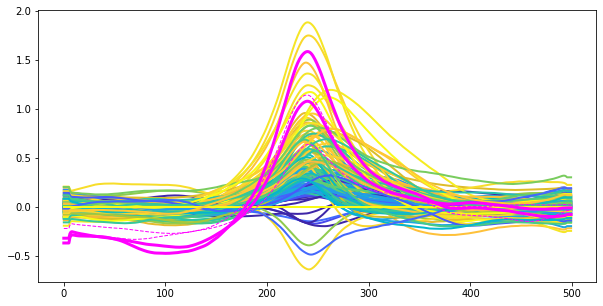

In [13]:
plt.figure(figsize=(10,5))
for i in range(250):
    if i in [77,185,186,227]:
        continue
    c = random.uniform(.3, .7)
    plt.plot(mean_traces[i],color=cmap(for_color[i]),lw=2)
for cluster in [77,185]:
    plt.plot(mean_traces[cluster],color='magenta',lw=3)
for cluster in [186,227]:
    plt.plot(mean_traces[cluster],color='magenta',lw=1,linestyle='--',alpha=1)

    
#plt.plot(mean_traces[25],color='k',lw=3)
#plt.plot(mean_traces[27],color='k',lw=3)
#plt.xlim(100,300)

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, f'{timestr}')
#plt.savefig(fname,dpi=300,bbox_inches='tight',transparent=True)

In [120]:
vs = []
for i in range(250):
    vs.append(mean_traces[i][50])
np.argmax(vs)

141

In [65]:
low

array([  0, 132, 133, 136, 137, 139, 140, 145, 148, 153, 155, 160, 161,
       164, 167, 168, 131, 169, 130, 127,  83,  87,  92,  96,  97,  98,
        99, 100, 105, 107, 108, 114, 118, 120, 125, 128,  81, 170, 174,
       217, 218, 220, 221, 222, 230, 231, 234, 235, 236, 238, 241, 242,
       243, 244, 214, 171, 211, 209, 177, 181, 183, 184, 190, 191, 192,
       193, 194, 196, 197, 202, 205, 207, 208, 210,  79, 124,  58,  45,
        68,  67,  59,  20,  53,  28,  46,  64,  13,  24,  23,  48,  49,
        15,  61,  44,  70,  35,  33,  74,  36,  37,   3,  29,  50,  31,
        56,  41,   8,  75,  42,  55, 239, 203,  27, 172, 150, 201,  11,
       224, 229, 198, 182, 141, 147, 165, 249, 152,  21,  80, 223, 176,
       237, 158,  77,  62,  17, 186, 180, 185,  12, 143,  94, 116,  85,
       156,  18, 175, 151, 109,   5,  38, 104, 142, 187, 115, 246, 227,
        65, 110, 204,   2, 245, 216, 226, 228, 112, 215, 206, 149,  47,
       219,  89,   9, 213,  52, 119,  14, 159, 225,  32,  76, 19

In [13]:
max_values = []
for cluster in range(250):
    a = filters[cluster,1,::-1]-filters[cluster+250,1,::-1]
    b = (filters[cluster,2,::-1]-filters[cluster+250,2,::-1])*-1
    mean_trace = (a+b)/2
    max_values.append(np.max(np.abs(mean_trace)))

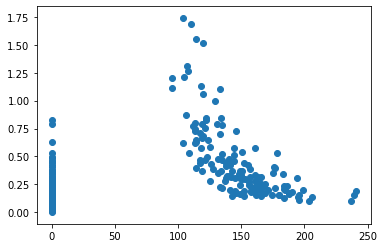

In [15]:
plt.scatter(break_points,max_values)

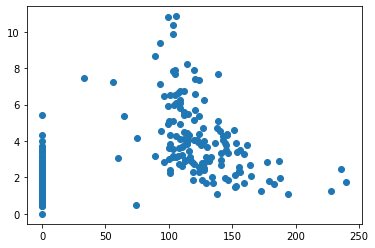

In [14]:
plt.scatter(break_points,max_values)

In [268]:
# ### new very simple version that just looks for the first timepoint the hemidiff is greater than a threshold
# # this will be 10% of max diff
# diff_thresh = 0.5

# plt.figure(figsize=(20,20))
# # use not-normalized
# # filter by correlation between two samples
# # define sym break by first tp !=0 that is continuous with main hump
# bad_SC = [208,234] #234 not bad, but peak diff is at 0
# r_thresh = .5
# derivative_thresh = 0.001

# break_points = []
# very_early_clusters = []
# very_late_clusters = []
# mean_traces = []
# for cluster in range(250):
#     flip = False
#     plt.subplot(25,10,cluster+1)
#     plt.axhline(0,color='k')
    
#     if cluster in bad_SC:
#         plt.title('bad_SC')
#         break_points.append(1000)
#         very_early_clusters.append(0)
#         very_late_clusters.append(0)
#         mean_traces.append(np.zeros((500)))
#         continue

#     a = filters[cluster,1,::-1]-filters[cluster+250,1,::-1]
#     b = (filters[cluster,2,::-1]-filters[cluster+250,2,::-1])*-1

#     r,_ = scipy.stats.pearsonr(a,b)
    
#     if r < r_thresh:
#         plt.title('bad r_thresh')
#         break_points.append(1000)
#         very_early_clusters.append(0)
#         very_late_clusters.append(0)
#         mean_traces.append(np.zeros((500)))
#         continue
    
#     mean_trace = (a+b)/2
    
#     ### see if should flip sign for the rare few
#     extreme_v = mean_trace[np.argmax(np.abs(mean_trace))]
#     if extreme_v < 0:
#         a*=-1; b*=-1; mean_trace*=-1
#         flip=True
    
#     peak = np.argmax(mean_trace)
    
#     if peak < 10:
#         plt.title('peak too early')
#         break_points.append(1000)
#         very_early_clusters.append(0)
#         very_late_clusters.append(0)
#         mean_traces.append(np.zeros((500)))
#         continue
        
#     if np.max(mean_trace) < .1:
#         plt.title('peak too small')
#         break_points.append(1000)
#         very_early_clusters.append(0)
#         very_late_clusters.append(0)
#         mean_traces.append(np.zeros((500)))
#         continue
    
#     try:
#         diff_thresh_ratio = np.max(np.abs(mean_trace)) * diff_thresh
#         break_point = np.where(np.abs(mean_trace)>diff_thresh_ratio)[0][0]
#     except IndexError:
#         break_point = 1000
    
# #     # find where derivative exceeds thresh just before peak 
# #     break_div = np.where(np.diff(mean_trace)[:peak][::-1][20:] < derivative_thresh)[0][0] + 20
# #     break_div = peak - break_div
    
# #     # find where trace exceeds thresh just before peak
# #     above_0 = mean_trace>0.01
# #     try:
# #         break_0 = np.where(above_0[:peak][::-1] == False)[0][0]
# #         break_0 = peak - break_0
# #     except IndexError:
# #         break_0 = 0
    
#     # use "latest" of cross 0 and derivative thresh
# #     break_point = np.max(np.asarray((break_div, break_0)))
#     break_points.append(break_point)
    
#     plt.axvline(peak,color='orange')
#     plt.axvline(break_point,color='r')
    
#     plt.plot(a,color='grey')
#     plt.plot(b,color='grey')
#     plt.plot(mean_trace,color='k')
    
#     plt.axis('off')
#     if flip is False:
#         plt.title(cluster)
#     else:
#         plt.title(F"{cluster} flip")
        
#     ### check for very early
#     very_early_clusters.append(np.mean(mean_trace[:100]))
#     very_late_clusters.append(np.mean(mean_trace[100:]))
#     mean_traces.append(mean_trace)

In [ ]:
#500 is 10 sec

In [51]:
10/500

0.02

In [53]:
5000-(20*104)

2920

In [ ]:
np.

In [ ]:
# start at -5, each bin is 20ms

In [49]:
break_points[27]

104

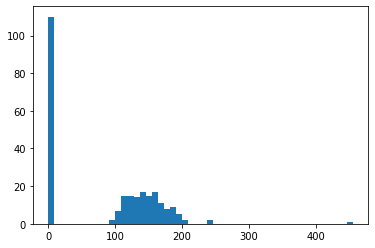

In [194]:
plt.hist(break_points,bins=50);

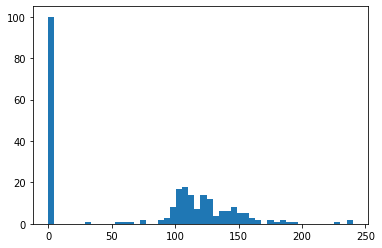

In [15]:
plt.hist(break_points,bins=50);

In [274]:
break_points

[0,
 204,
 135,
 0,
 176,
 126,
 190,
 161,
 0,
 141,
 157,
 107,
 120,
 0,
 144,
 0,
 156,
 119,
 123,
 196,
 0,
 114,
 195,
 0,
 0,
 177,
 158,
 104,
 0,
 0,
 148,
 0,
 145,
 0,
 149,
 0,
 0,
 0,
 128,
 150,
 180,
 0,
 0,
 161,
 0,
 0,
 0,
 140,
 0,
 0,
 0,
 239,
 143,
 0,
 196,
 0,
 0,
 149,
 0,
 0,
 188,
 0,
 118,
 180,
 0,
 133,
 175,
 0,
 0,
 157,
 0,
 161,
 158,
 186,
 0,
 0,
 145,
 118,
 162,
 0,
 114,
 0,
 166,
 0,
 152,
 122,
 151,
 0,
 149,
 141,
 163,
 184,
 0,
 185,
 121,
 241,
 0,
 0,
 0,
 0,
 0,
 455,
 199,
 184,
 129,
 0,
 169,
 0,
 0,
 125,
 134,
 151,
 138,
 156,
 0,
 132,
 121,
 152,
 0,
 143,
 0,
 168,
 164,
 166,
 0,
 0,
 153,
 0,
 0,
 174,
 0,
 0,
 0,
 0,
 169,
 177,
 0,
 0,
 155,
 0,
 0,
 113,
 131,
 120,
 184,
 0,
 194,
 113,
 0,
 139,
 105,
 125,
 114,
 0,
 162,
 0,
 122,
 162,
 117,
 144,
 0,
 0,
 158,
 151,
 0,
 113,
 206,
 0,
 0,
 0,
 0,
 0,
 104,
 171,
 0,
 124,
 117,
 0,
 160,
 188,
 119,
 0,
 112,
 0,
 0,
 120,
 119,
 132,
 146,
 166,
 0,
 0,
 0,
 0,
 0,


In [275]:
np.where(np.asarray(break_points)==455)

(array([101]),)

In [8]:
atlas_clean = brainsss.load_roi_atlas()
explosion_rois = brainsss.load_explosion_groups()
all_rois = brainsss.unnest_roi_groups(explosion_rois)
roi_masks = brainsss.make_single_roi_masks(all_rois, atlas_clean)
roi_contours = brainsss.make_single_roi_contours(roi_masks, atlas_clean)

In [4]:
### lets visualize these high ipsi low contra on brain
file = os.path.join(cluster_dir, 'superclusters_more.npy')
superclusters = np.load(file)
#with 249 there will be clusters 1-250 inclusive (len=250). cluster 140 is background
superclusters_250 = superclusters[:,:,:,249]
# right brain gets +250 to cluster ID so now 500 clusters
superclusters_250[157:,:,:] += 250

In [5]:
superclusters_250.shape

(314, 146, 91)

In [25]:
sizes = []
for i in range(250):
    size = np.sum(superclusters_250==i)
    if size < 400000:
        sizes.append(size)

(array([210.,  18.,   9.,   5.,   3.,   0.,   1.,   1.,   1.,   1.]),
 array([    0. ,  4078.6,  8157.2, 12235.8, 16314.4, 20393. , 24471.6,
        28550.2, 32628.8, 36707.4, 40786. ]),
 <a list of 10 Patch objects>)

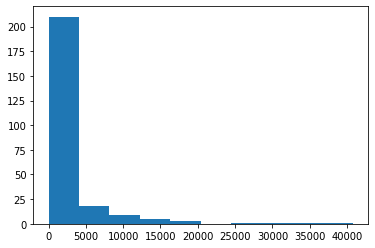

In [26]:
plt.hist(sizes)

In [27]:
np.median(sizes)

998.0

In [ ]:
# 1000 of these 2x2x2um voxels

In [ ]:
# if "1", v=8um^3

In [28]:
1000/8

125.0

In [33]:
10**3

1000

In [11]:
### color brain by peak time
brain = np.zeros((314, 146, 91))
for cluster in tqdm.tqdm(range(250)):
    ind = np.where(superclusters_250==cluster)
    brain[ind[0],ind[1],ind[2]] = break_points[cluster]

100%|██████████| 250/250 [00:06<00:00, 38.86it/s]


In [12]:
### color brain by peak time
# VERSION TO COLOR BOTH HEMIS
brain = np.zeros((314, 146, 91))
for cluster in tqdm.tqdm(range(250)):
    ind = np.where(superclusters_250==cluster)
    brain[ind[0],ind[1],ind[2]] = break_points[cluster]
    ind = np.where(superclusters_250==cluster+250)
    brain[ind[0],ind[1],ind[2]] = break_points[cluster]

100%|██████████| 250/250 [00:12<00:00, 19.25it/s]


In [177]:
ind = np.where(superclusters_250==77)
print(len(ind[0]))
ind = np.where(superclusters_250==185)
print(len(ind[0]))

784
211


In [178]:
784+211

995

In [186]:
len(np.where(atlas_clean==38)[0])

10528

In [6]:
### color very early regions
brain = np.zeros((314, 146, 91))
temp = [77, 185, 227]
for cluster in temp:#[57, 77, 185, 186]:#[77,185]:#[77,185,186,227,141]:
    ind = np.where(superclusters_250==cluster)
    brain[ind[0],ind[1],ind[2]] = 10

In [15]:
temporal_map = brain

In [16]:
temporal_map = 200-brain
temporal_map[np.where(temporal_map==200)] = 0
#temporal_map[np.where(temporal_map==-800)] = 0 #use this one if using "new" version (which I dont like)

In [16]:
temporal_map.shape

(314, 146, 91)

(0, 100000)

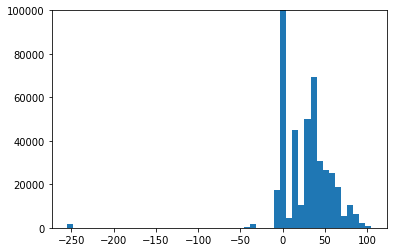

In [198]:
plt.hist(temporal_map.flatten(),bins=50);
plt.ylim(0,100000)

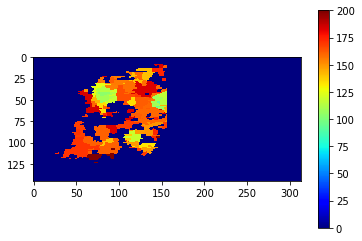

In [87]:
plt.imshow(brain[:,:,60].T,vmin=0,vmax=200,cmap='jet')
plt.colorbar()

In [13]:
def plot_grouped_roi_image(rois,plot=True):
    roi_data = []
    roi_contours = []

    left_edges = []
    right_edges = []
    bottom_edges = []
    top_edges = []

    for roi in rois:
        ####################
        ### Get roi mask ###
        ####################

        mask = np.zeros(atlas_clean.shape)
        mask[np.where(atlas_clean == roi)] = 1

        mask_eroded = binary_erosion(mask, structure=np.ones((2,2,2)))
        mask_dilated = binary_dilation(mask_eroded, iterations=2)

        # temporal
        masked_roi = mask_dilated*temporal_map #CORR
        masked_roi_flat = np.max(masked_roi,axis=2)
        roi_data.append(masked_roi_flat)
        
        #PCA
#         masked_roi = mask_dilated*pca_map
#         maxs = np.max(masked_roi,axis=2)
#         mins = np.min(masked_roi,axis=2)
#         maxs[np.where(np.abs(mins)>maxs)] = mins[np.where(np.abs(mins)>maxs)]
#         masked_roi_flat = maxs
#         roi_data.append(masked_roi_flat)
    
        #######################
        ### Get roi contour ###
        #######################
        
        _, mask_binary = cv2.threshold(np.max(mask_dilated,axis=-1).astype('uint8'), 0, 1, cv2.THRESH_BINARY) 
        contours, _ = cv2.findContours(mask_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)#cv2.RETR_TREE

        canvas = np.ones(atlas_clean[:,:,0].shape)
        out = cv2.drawContours(canvas, contours, -1, (0,255,0), 1)
        out = np.abs(out-1) #flip 0/1
        roi_contour = np.repeat(out[:,:,np.newaxis],repeats=4,axis=-1) ### copy into rgba channels to make white
        roi_contours.append(roi_contour)

        # for plotting
        left_edges.append(np.where(np.sum(np.nan_to_num(roi_contour),axis=0)>0)[0][0])
        right_edges.append(np.where(np.sum(np.nan_to_num(roi_contour),axis=0)>0)[0][-1])
        top_edges.append(np.where(np.sum(np.nan_to_num(roi_contour),axis=1)>0)[0][0])
        bottom_edges.append(np.where(np.sum(np.nan_to_num(roi_contour),axis=1)>0)[0][-1])
        
    # get extreme edges from all rois used
    left_edge = np.min(left_edges) - 1
    right_edge = np.max(right_edges) + 1
    top_edge = np.min(top_edges) - 1
    bottom_edge = np.max(bottom_edges) + 1

    ############
    ### PLOT ###
    ############
    
    roi_datas = np.max(np.asarray(roi_data),axis=0)
    data_map = np.swapaxes(roi_datas[top_edge:bottom_edge,left_edge:right_edge],0,1)
    
    #PCA
#     roi_data = np.asarray(roi_data)
#     maxs = np.max(roi_data,axis=0)
#     mins = np.min(roi_data,axis=0)
#     maxs[np.where(np.abs(mins)>maxs)] = mins[np.where(np.abs(mins)>maxs)]
#     data_map = np.swapaxes(maxs[top_edge:bottom_edge,left_edge:right_edge],0,1)

    if plot:
        plt.figure(figsize=(10,10))
        plt.imshow(data_map)

    contours_to_export = []
    for i in range(len(roi_contours)):
        single_contour = np.swapaxes(roi_contours[i][top_edge:bottom_edge,left_edge:right_edge],0,1)
        contours_to_export.append(single_contour)
        if plot:
            plt.imshow(single_contour)
        
    return data_map, contours_to_export

def place_on_canvas(input_canvas, to_plot, is_contour=False, is_midline=True, x_shift=0, y_shift=0):
    full_y_mid = int(input_canvas.shape[0]/2)
    full_x_mid = int(input_canvas.shape[1]/2)

    y_mid = int(to_plot.shape[0]/2)
    x_mid = int(to_plot.shape[1]/2)

    height = to_plot.shape[0]
    width = to_plot.shape[1]

    left = full_x_mid-x_mid
    right = left + width

    top = full_y_mid-y_mid
    bottom = top + height

    if is_contour:
        ys = np.where(to_plot[:,:,0]>0)[0] + full_y_mid - y_mid + y_shift
        xs = np.where(to_plot[:,:,0]>0)[1] + full_x_mid - x_mid + x_shift
        input_canvas[ys,xs]=1
    else:
        #input_canvas[top+y_shift:bottom+y_shift,left+x_shift:right+x_shift,:3] = to_plot
        input_canvas[top+y_shift:bottom+y_shift,left+x_shift:right+x_shift] = to_plot #pca
    return input_canvas

def place_on_canvas_wrapper(canvas, data_map, contours, y_shift, x_shift):
    canvas = place_on_canvas(canvas, to_plot=data_map, y_shift=y_shift, x_shift=x_shift)
    for i in range(len(contours)):
        canvas = place_on_canvas(canvas, to_plot=contours[i], is_contour=True, y_shift=y_shift, x_shift=x_shift)
    return canvas

def wraper_wraper(canvas, roi_ids, y_shift, x_shift):
    data_map, contours = plot_grouped_roi_image(roi_ids, plot=False)
    canvas = place_on_canvas_wrapper(input_canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)
    return canvas

In [14]:
##################
### ROI GROUPS ###
##################

FB_group = {
26: 'FB',
4: 'NO',
5: 'BU_R',
54: 'BU_L',
8: 'LAL_R',
56: 'LAL_L',
31: 'PVLP_R',
76: 'PVLP_L'}

ventromedial_r_group = {
13: 'VES_R',  
40: 'EPA_R',
35: 'GOR_R',
11: 'AMMC_R'}

ventromedial_l_group = {
60: 'VES_L', 
85: 'EPA_L',
80: 'GOR_L',
58: 'AMMC_L'}

PB = {6: 'PB'}
EB = {23: 'EB'}

anterior_group = {
50: 'PRW',
9: 'SAD',
49: 'GNG',
30: 'AVLP_R',
75: 'AVLP_L',
24: 'AL_R',
70: 'AL_L',
64: 'MB_PED_L',
65: 'MB_VL_L',
66: 'MB_ML_L',
81: 'MB_CA_L',
17: 'MB_PED_R',
18: 'MB_VL_R',
19: 'MB_ML_R',
36: 'MB_CA_R',
32: 'IVLP_R',
77: 'IVLP_L',
10: 'CAN_R',
20: 'FLA_R',
57: 'CAN_L',
67: 'FLA_L'}

big_r_group = {
27: 'SLP_R',
29: 'SMP_R',
33: 'PLP_R',
7: 'LH_R',
38: 'IPS_R',
37: 'SPS_R',
16: 'CRE_R',
39: 'SCL_R',
12: 'ICL_R',
15: 'ATL_R',
14: 'IB_R',
28: 'SIP_R'}
    
big_l_group = {
72: 'SLP_L',   
74: 'SMP_L',
78: 'PLP_L',
55: 'LH_L',
83: 'IPS_L',
82: 'SPS_L',
63: 'CRE_L',
84: 'SCL_L',  
59: 'ICL_L',
62: 'ATL_L',
61: 'IB_L',
73: 'SIP_L'}

In [12]:
#input_canvas = np.zeros((500,500,3))
input_canvas = np.zeros((500,500)) #pca


x_shift=0; y_shift=0
data_map, contours = plot_grouped_roi_image(FB_group.keys(), plot=False)
canvas = place_on_canvas_wrapper(input_canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)

x_shift=0; y_shift=-45
data_map, contours = plot_grouped_roi_image(PB.keys(), plot=False)
canvas = place_on_canvas_wrapper(canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)

x_shift=0; y_shift=35
data_map, contours = plot_grouped_roi_image({23: 'EB'}.keys(), plot=False)
canvas = place_on_canvas_wrapper(canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)

##########
### MB ###
##########

# x_shift=60; y_shift=-50
# data_map, contours = plot_grouped_roi_image(MB_left_group.keys(), plot=False)
# canvas = place_on_canvas_wrapper(input_canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)
# x_shift=-60; y_shift=-50
# data_map, contours = plot_grouped_roi_image(MB_right_group.keys(), plot=False)
# canvas = place_on_canvas_wrapper(input_canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)

#################
### BIG GROUP ###
#################

x_shift=-130; y_shift=30
data_map, contours = plot_grouped_roi_image(big_r_group.keys(), plot=False)
canvas = place_on_canvas_wrapper(input_canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)
x_shift=130; y_shift=30
data_map, contours = plot_grouped_roi_image(big_l_group.keys(), plot=False)
canvas = place_on_canvas_wrapper(input_canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)

##############
### VISUAL ###
##############

x_shift=-200; y_shift=175
data_map, contours = plot_grouped_roi_image({25: 'MED_R'}.keys(), plot=False)
canvas = place_on_canvas_wrapper(input_canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)
x_shift=200; y_shift=175
data_map, contours = plot_grouped_roi_image({71: 'MED_L'}.keys(), plot=False)
canvas = place_on_canvas_wrapper(input_canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)

x_shift=-140; y_shift=40+175
data_map, contours = plot_grouped_roi_image({3: 'LO_R'}.keys(), plot=False)
canvas = place_on_canvas_wrapper(input_canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)
x_shift=140; y_shift=40+175
data_map, contours = plot_grouped_roi_image({53: 'LO_L'}.keys(), plot=False)
canvas = place_on_canvas_wrapper(input_canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)

x_shift=-140; y_shift=-30+175
data_map, contours = plot_grouped_roi_image({22: 'LP_R'}.keys(), plot=False)
canvas = place_on_canvas_wrapper(input_canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)
x_shift=140; y_shift=-30+175
data_map, contours = plot_grouped_roi_image({69: 'LP_L'}.keys(), plot=False)
canvas = place_on_canvas_wrapper(input_canvas, data_map, contours, y_shift=y_shift, x_shift=x_shift)

canvas = wraper_wraper(canvas, ventromedial_r_group.keys(), y_shift=55, x_shift=-50)
canvas = wraper_wraper(canvas, ventromedial_l_group.keys(), y_shift=55, x_shift=50)

canvas = wraper_wraper(canvas, anterior_group.keys(), y_shift=150, x_shift=0)

canvas = wraper_wraper(canvas, {34: 'AOTU_R'}.keys(), y_shift=-50+175-15, x_shift=-80)
canvas = wraper_wraper(canvas, {79: 'AOTU_L'}.keys(), y_shift=-50+175-15, x_shift=80)
    
canvas[np.where(canvas==0)] = np.nan

# plt.figure(figsize=(10,10))
# plt.imshow(canvas[150:,:],cmap=mymap,vmin=end_c,vmax=start_c)
# plt.axis('off')

# save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
# timestr = time.strftime("%Y%m%d-%H%M%S")
# fname = os.path.join(save_path, f'{timestr}')
# #plt.savefig(fname,dpi=300,bbox_inches='tight')

In [34]:
#50 is 1sec
# here 0 is defined as 1sec before, and 100 

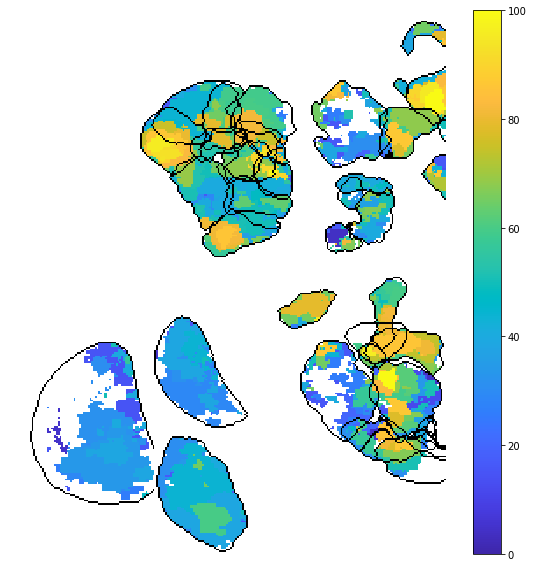

In [14]:
borders = np.zeros((500,500,4))
borders[np.where(canvas==1)] = 0
borders[np.where(canvas==1)[0],np.where(canvas==1)[1],3] = 1

plt.figure(figsize=(10,10))
plt.imshow(canvas[190:,:250],vmin=0,vmax=100,cmap=parula) #.01
cmap_early = LinearSegmentedColormap.from_list('mycmap', ['magenta', 'magenta'])
#plt.imshow(canvas[190:,:250],vmin=0,vmax=10,cmap=cmap_early) #.01

plt.colorbar()
plt.imshow(borders[190:,:250])
plt.axis('off')

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, f'{timestr}')
#plt.savefig(fname,dpi=300,bbox_inches='tight',transparent=True)

# single slices, bitches

In [17]:
temporal_map.shape

(314, 146, 91)

In [20]:
temporal_map_norm = temporal_map/100
temporal_map_rgb = parula(temporal_map_norm)
temporal_map_rgb.shape

(314, 146, 91, 4)

In [21]:
### add pink

for cluster in [77,185,227,77+250,185+250,227+250]:
    ind = np.where(superclusters_250==cluster)
    temporal_map_rgb[ind[0],ind[1],ind[2],:] = [1,0,1,1]

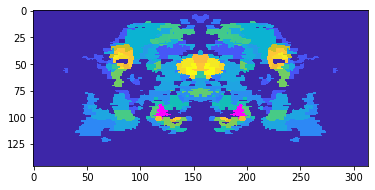

In [22]:
plt.imshow(np.swapaxes(temporal_map_rgb[:,:,57,:],0,1))

In [23]:
maps_voxel_high_res = ants.resample_image(ants.from_numpy(temporal_map_rgb),(1256, 584, 363, 4),use_voxels=True)
maps_voxel_high_res.shape

(1256, 584, 363, 4)

In [24]:
##################
### MAKE ALPHA ###
##################
background = maps_voxel_high_res[0,0,0,0]
signals = maps_voxel_high_res.numpy()
alpha = np.ones((1256, 584, 363))
alpha[np.where(maps_voxel_high_res[:,:,:,0]==background)]=0
signals[:,:,:,3] = alpha

In [25]:
##################
### Load Atlas ###
##################

atlas_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/jfrc_2018_rois_improve_reorient_transformed_nearest_neighbor.nii"
atlas = np.asarray(nib.load(atlas_path).get_data().squeeze(), dtype='float32')
atlas = ants.from_numpy(atlas)
atlas.set_spacing((.76,.76,.76))
#atlas = ants.resample_image(atlas,(2,2,2),use_voxels=False)
atlas = ants.resample_image(atlas,(.5,.5,.5),use_voxels=False)
atlas.shape

(1256, 584, 363)

In [26]:
atlas = atlas.numpy()
atlas_int = atlas.astype('uint8')

In [27]:
##########################
### Load High Res Anat ###
##########################

load_file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/20210817_luke_mean_highres.nii"
anat_high_res = np.asarray(nib.load(load_file).get_data().squeeze(), dtype='float32')
anat_high_res.shape

(1256, 584, 363)

In [28]:
signals[np.where(anat_high_res==0)] = 0

In [60]:
signals.shape

(1256, 584, 363, 4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


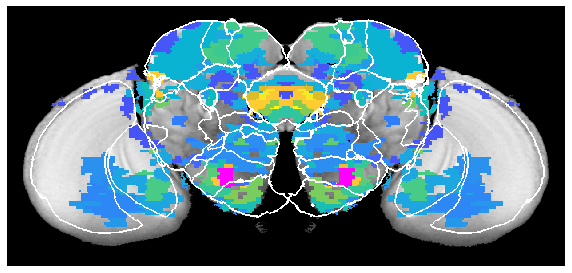

In [29]:
z=215
# get edges for this slice
edges = cv2.Canny(atlas_int[:,:,z],1,1)
edges = binary_dilation(edges, iterations=1)
edges = scipy.ndimage.median_filter(edges,2)
edges_ = np.repeat(edges.astype('int')[:,:,np.newaxis],repeats=4,axis=-1) ### copy into rgba channels to make white

plt.figure(figsize=(10,10))
plt.imshow(anat_high_res[:,:,z].T,cmap='gray')
plt.imshow(np.swapaxes(signals[:,:,z,:],0,1))
plt.imshow(np.swapaxes(edges_,0,1)*10000)

plt.axis('off')
save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs/'
timestr = time.strftime("%Y%m%d-%H%M%S")
#label = format(z, '03d')
fname = os.path.join(save_path, f'{timestr}')
plt.margins(0,0)
#plt.savefig(fname,dpi=300,bbox_inches='tight',pad_inches=0.0,transparent = True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


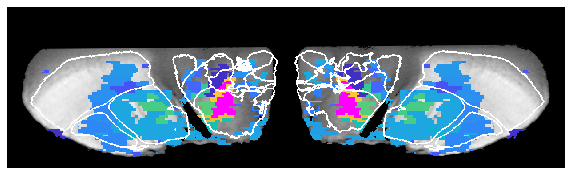

In [170]:
z=385#265
# get edges for this slice
edges = cv2.Canny(atlas_int[:,z,:],1,1)
edges = binary_dilation(edges, iterations=1)
edges = scipy.ndimage.median_filter(edges,2)
edges_ = np.repeat(edges.astype('int')[:,:,np.newaxis],repeats=4,axis=-1) ### copy into rgba channels to make white

plt.figure(figsize=(10,10))
plt.imshow(anat_high_res[:,z,:].T,cmap='gray')
plt.imshow(np.swapaxes(signals[:,z,:,:],0,1))
plt.imshow(np.swapaxes(edges_,0,1)*10000)

plt.axis('off')
save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs/'
timestr = time.strftime("%Y%m%d-%H%M%S")
#label = format(z, '03d')
fname = os.path.join(save_path, f'{timestr}')
plt.margins(0,0)
plt.savefig(fname,dpi=300,bbox_inches='tight',pad_inches=0.0,transparent = True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


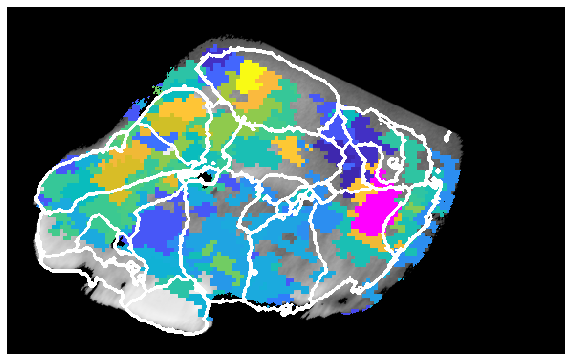

In [182]:
z=490
# get edges for this slice
edges = cv2.Canny(atlas_int[z,:,:],1,1)
edges = binary_dilation(edges, iterations=1)
edges = scipy.ndimage.median_filter(edges,2)
edges_ = np.repeat(edges.astype('int')[:,:,np.newaxis],repeats=4,axis=-1) ### copy into rgba channels to make white

plt.figure(figsize=(10,10))
plt.imshow(anat_high_res[z,:,:].T,cmap='gray')
plt.imshow(np.swapaxes(signals[z,:,:,:],0,1))
plt.imshow(np.swapaxes(edges_,0,1)*10000)

plt.axis('off')
save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs/'
timestr = time.strftime("%Y%m%d-%H%M%S")
#label = format(z, '03d')
fname = os.path.join(save_path, f'{timestr}')
plt.margins(0,0)
plt.savefig(fname,dpi=300,bbox_inches='tight',pad_inches=0.0,transparent = True)

In [ ]:
##ROTATE TO MATCH BRAIN WHILE IMAGING. (to find IPS zoom)

In [47]:
anat_high_res.shape

(1256, 584, 363)

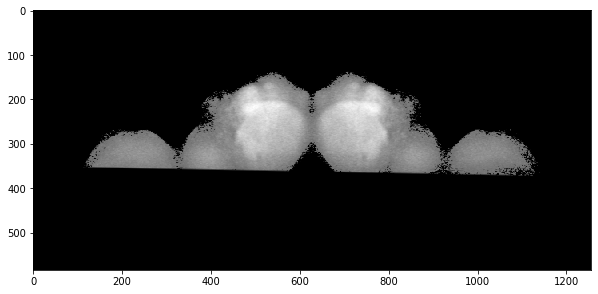

In [46]:
plt.figure(figsize=(10,10))
z=80
plt.imshow(anat_high_res[:,:,z].T,cmap='gray')

In [34]:
fda = ants.from_numpy(anat_high_res)

In [54]:
fda.set_spacing((0.38,0.38,0.38))

In [55]:
fda

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (1256, 584, 363)
	 Spacing    : (0.38, 0.38, 0.38)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [35]:
tx=ants.new_ants_transform()

In [36]:
tx

ANTsTransform
	 Type       : AffineTransform
	 Dimension  : 3
	 Precision  : float

In [38]:
tx.parameters[0] = 2

In [39]:
tx.parameters

array([1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.])

In [40]:
### Load Luke Mean ###
luke_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/20210310_luke_exp_thresh.nii"
res_luke_mean = (0.65,0.65,1)
luke_mean = np.asarray(nib.load(luke_path).get_data().squeeze(), dtype='float32')
luke_mean = luke_mean[:,:,::-1] #flipz
luke_mean = ants.from_numpy(luke_mean)
luke_mean.set_spacing(res_luke_mean)
luke_mean_lowres =  ants.resample_image(luke_mean,(256,128,49),use_voxels=True)

In [48]:
luke_mean

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (1024, 512, 256)
	 Spacing    : (0.65, 0.65, 1.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

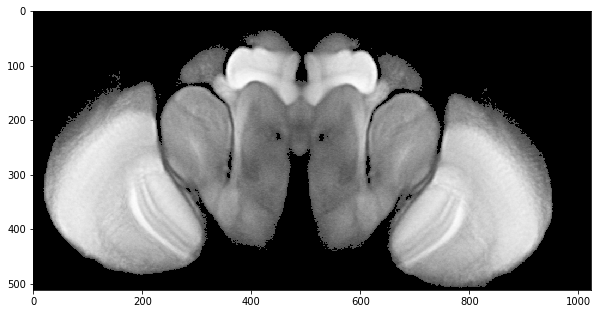

In [59]:
plt.figure(figsize=(10,10))
plt.imshow(luke_mean[:,:,100].T,cmap='gray')

In [56]:
out = ants.registration(luke_mean, fda, type_of_transform='Affine')

In [50]:
out

{'fwdtransforms': ['/tmp/tmp4zs6maue0GenericAffine.mat'],
 'invtransforms': ['/tmp/tmp4zs6maue0GenericAffine.mat'],
 'warpedfixout': ANTsImage (RAI)
 	 Pixel Type : float (float32)
 	 Components : 1
 	 Dimensions : (1256, 584, 363)
 	 Spacing    : (1.0, 1.0, 1.0)
 	 Origin     : (0.0, 0.0, 0.0)
 	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.],
 'warpedmovout': ANTsImage (RAI)
 	 Pixel Type : float (float32)
 	 Components : 1
 	 Dimensions : (1024, 512, 256)
 	 Spacing    : (0.65, 0.65, 1.0)
 	 Origin     : (0.0, 0.0, 0.0)
 	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]}

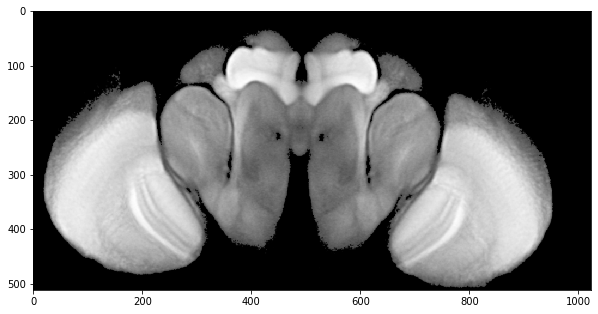

In [58]:
plt.figure(figsize=(10,10))
plt.imshow(out['warpedmovout'][:,:,100].T,cmap='gray')

In [63]:
temporal_map_pink.shape

(314, 146, 91)

In [6]:
### add pink (PINK ONLY VERSION)

temporal_map_pink = np.zeros((314, 146, 91))
for cluster in range(500):#[77,185,227,77+250,185+250,227+250]:
    ind = np.where(superclusters_250==cluster)
    temporal_map_pink[ind[0],ind[1],ind[2]] = 1

In [12]:
### add pink (PINK ONLY VERSION)

temporal_map_pink = np.zeros((314, 146, 91))
for cluster in [77,185,227,77+250,185+250,227+250,116,156]:
    ind = np.where(superclusters_250==cluster)
    temporal_map_pink[ind[0],ind[1],ind[2]] = 2

In [14]:
###this is for saving in lowres FDA space without warping
pink_location = ants.resample_image(ants.from_numpy(temporal_map_pink),(826, 384, 240),use_voxels=True)
pink_location.shape


###

(826, 384, 240)

In [16]:
save_file = os.path.join(cluster_dir, '20230720_test.nii')
nib.Nifti1Image(pink_location.numpy(), np.eye(4)).to_filename(save_file)

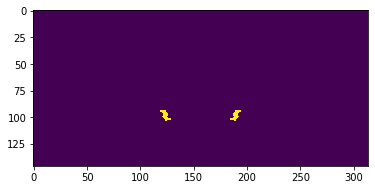

In [11]:
plt.imshow(temporal_map_pink[:,:,50].T)

In [11]:
pink_location = ants.resample_image(ants.from_numpy(temporal_map_pink),(1256, 584, 363),use_voxels=True)
pink_location.shape

(1256, 584, 363)

In [13]:
pink_location.set_spacing((0.38,0.38,0.38))

(628, 292, 182)

In [75]:
pink_warped = ants.apply_transforms(luke_mean,
                       pink_location,
                       out['fwdtransforms'],
                       interpolator='nearestNeighbor')

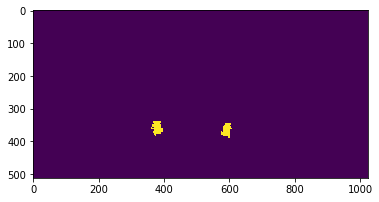

In [77]:
plt.imshow(pink_warped[:,:,100].T)

In [80]:
save_file = os.path.join(cluster_dir, '20230706_premotorcenter.nii')
nib.Nifti1Image(pink_warped.numpy(), np.eye(4)).to_filename(save_file)

In [81]:
save_file = os.path.join(cluster_dir, '20230706_premotorcenter_atlas.nii')
nib.Nifti1Image(out['warpedmovout'].numpy(), np.eye(4)).to_filename(save_file)

In [79]:
pink_warped, out['warpedmovout']

(ANTsImage (RAI)
 	 Pixel Type : float (float32)
 	 Components : 1
 	 Dimensions : (1024, 512, 256)
 	 Spacing    : (0.65, 0.65, 1.0)
 	 Origin     : (0.0, 0.0, 0.0)
 	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.], ANTsImage (RAI)
 	 Pixel Type : float (float32)
 	 Components : 1
 	 Dimensions : (1024, 512, 256)
 	 Spacing    : (0.65, 0.65, 1.0)
 	 Origin     : (0.0, 0.0, 0.0)
 	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.])

In [82]:
save_file = os.path.join(cluster_dir, '20230706_premotorcenter_lowres.nii')
nib.Nifti1Image(ants.resample_image(pink_warped,(4,4,4),use_voxels=False).numpy(), np.eye(4)).to_filename(save_file)

In [83]:
save_file = os.path.join(cluster_dir, '20230706_premotorcenter_atlas_lowres.nii')
nib.Nifti1Image(ants.resample_image(out['warpedmovout'],(4,4,4),use_voxels=False).numpy(), np.eye(4)).to_filename(save_file)

In [15]:
.747*(2/5)

0.2988

In [19]:
import matplotlib.colors as mcolors


parula_data = [[0.2422, 0.1504, 0.6603],
[0.2444, 0.1534, 0.6728],
[0.2464, 0.1569, 0.6847],
[0.2484, 0.1607, 0.6961],
[0.2503, 0.1648, 0.7071],
[0.2522, 0.1689, 0.7179],
[0.254, 0.1732, 0.7286],
[0.2558, 0.1773, 0.7393],
[0.2576, 0.1814, 0.7501],
[0.2594, 0.1854, 0.761],
[0.2611, 0.1893, 0.7719],
[0.2628, 0.1932, 0.7828],
[0.2645, 0.1972, 0.7937],
[0.2661, 0.2011, 0.8043],
[0.2676, 0.2052, 0.8148],
[0.2691, 0.2094, 0.8249],
[0.2704, 0.2138, 0.8346],
[0.2717, 0.2184, 0.8439],
[0.2729, 0.2231, 0.8528],
[0.274, 0.228, 0.8612],
[0.2749, 0.233, 0.8692],
[0.2758, 0.2382, 0.8767],
[0.2766, 0.2435, 0.884],
[0.2774, 0.2489, 0.8908],
[0.2781, 0.2543, 0.8973],
[0.2788, 0.2598, 0.9035],
[0.2794, 0.2653, 0.9094],
[0.2798, 0.2708, 0.915],
[0.2802, 0.2764, 0.9204],
[0.2806, 0.2819, 0.9255],
[0.2809, 0.2875, 0.9305],
[0.2811, 0.293, 0.9352],
[0.2813, 0.2985, 0.9397],
[0.2814, 0.304, 0.9441],
[0.2814, 0.3095, 0.9483],
[0.2813, 0.315, 0.9524],
[0.2811, 0.3204, 0.9563],
[0.2809, 0.3259, 0.96],
[0.2807, 0.3313, 0.9636],
[0.2803, 0.3367, 0.967],
[0.2798, 0.3421, 0.9702],
[0.2791, 0.3475, 0.9733],
[0.2784, 0.3529, 0.9763],
[0.2776, 0.3583, 0.9791],
[0.2766, 0.3638, 0.9817],
[0.2754, 0.3693, 0.984],
[0.2741, 0.3748, 0.9862],
[0.2726, 0.3804, 0.9881],
[0.271, 0.386, 0.9898],
[0.2691, 0.3916, 0.9912],
[0.267, 0.3973, 0.9924],
[0.2647, 0.403, 0.9935],
[0.2621, 0.4088, 0.9946],
[0.2591, 0.4145, 0.9955],
[0.2556, 0.4203, 0.9965],
[0.2517, 0.4261, 0.9974],
[0.2473, 0.4319, 0.9983],
[0.2424, 0.4378, 0.9991],
[0.2369, 0.4437, 0.9996],
[0.2311, 0.4497, 0.9995],
[0.225, 0.4559, 0.9985],
[0.2189, 0.462, 0.9968],
[0.2128, 0.4682, 0.9948],
[0.2066, 0.4743, 0.9926],
[0.2006, 0.4803, 0.9906],
[0.195, 0.4861, 0.9887],
[0.1903, 0.4919, 0.9867],
[0.1869, 0.4975, 0.9844],
[0.1847, 0.503, 0.9819],
[0.1831, 0.5084, 0.9793],
[0.1818, 0.5138, 0.9766],
[0.1806, 0.5191, 0.9738],
[0.1795, 0.5244, 0.9709],
[0.1785, 0.5296, 0.9677],
[0.1778, 0.5349, 0.9641],
[0.1773, 0.5401, 0.9602],
[0.1768, 0.5452, 0.956],
[0.1764, 0.5504, 0.9516],
[0.1755, 0.5554, 0.9473],
[0.174, 0.5605, 0.9432],
[0.1716, 0.5655, 0.9393],
[0.1686, 0.5705, 0.9357],
[0.1649, 0.5755, 0.9323],
[0.161, 0.5805, 0.9289],
[0.1573, 0.5854, 0.9254],
[0.154, 0.5902, 0.9218],
[0.1513, 0.595, 0.9182],
[0.1492, 0.5997, 0.9147],
[0.1475, 0.6043, 0.9113],
[0.1461, 0.6089, 0.908],
[0.1446, 0.6135, 0.905],
[0.1429, 0.618, 0.9022],
[0.1408, 0.6226, 0.8998],
[0.1383, 0.6272, 0.8975],
[0.1354, 0.6317, 0.8953],
[0.1321, 0.6363, 0.8932],
[0.1288, 0.6408, 0.891],
[0.1253, 0.6453, 0.8887],
[0.1219, 0.6497, 0.8862],
[0.1185, 0.6541, 0.8834],
[0.1152, 0.6584, 0.8804],
[0.1119, 0.6627, 0.877],
[0.1085, 0.6669, 0.8734],
[0.1048, 0.671, 0.8695],
[0.1009, 0.675, 0.8653],
[0.0964, 0.6789, 0.8609],
[0.0914, 0.6828, 0.8562],
[0.0855, 0.6865, 0.8513],
[0.0789, 0.6902, 0.8462],
[0.0713, 0.6938, 0.8409],
[0.0628, 0.6972, 0.8355],
[0.0535, 0.7006, 0.8299],
[0.0433, 0.7039, 0.8242],
[0.0328, 0.7071, 0.8183],
[0.0234, 0.7103, 0.8124],
[0.0155, 0.7133, 0.8064],
[0.0091, 0.7163, 0.8003],
[0.0046, 0.7192, 0.7941],
[0.0019, 0.722, 0.7878],
[0.0009, 0.7248, 0.7815],
[0.0018, 0.7275, 0.7752],
[0.0046, 0.7301, 0.7688],
[0.0094, 0.7327, 0.7623],
[0.0162, 0.7352, 0.7558],
[0.0253, 0.7376, 0.7492],
[0.0369, 0.74, 0.7426],
[0.0504, 0.7423, 0.7359],
[0.0638, 0.7446, 0.7292],
[0.077, 0.7468, 0.7224],
[0.0899, 0.7489, 0.7156],
[0.1023, 0.751, 0.7088],
[0.1141, 0.7531, 0.7019],
[0.1252, 0.7552, 0.695],
[0.1354, 0.7572, 0.6881],
[0.1448, 0.7593, 0.6812],
[0.1532, 0.7614, 0.6741],
[0.1609, 0.7635, 0.6671],
[0.1678, 0.7656, 0.6599],
[0.1741, 0.7678, 0.6527],
[0.1799, 0.7699, 0.6454],
[0.1853, 0.7721, 0.6379],
[0.1905, 0.7743, 0.6303],
[0.1954, 0.7765, 0.6225],
[0.2003, 0.7787, 0.6146],
[0.2061, 0.7808, 0.6065],
[0.2118, 0.7828, 0.5983],
[0.2178, 0.7849, 0.5899],
[0.2244, 0.7869, 0.5813],
[0.2318, 0.7887, 0.5725],
[0.2401, 0.7905, 0.5636],
[0.2491, 0.7922, 0.5546],
[0.2589, 0.7937, 0.5454],
[0.2695, 0.7951, 0.536],
[0.2809, 0.7964, 0.5266],
[0.2929, 0.7975, 0.517],
[0.3052, 0.7985, 0.5074],
[0.3176, 0.7994, 0.4975],
[0.3301, 0.8002, 0.4876],
[0.3424, 0.8009, 0.4774],
[0.3548, 0.8016, 0.4669],
[0.3671, 0.8021, 0.4563],
[0.3795, 0.8026, 0.4454],
[0.3921, 0.8029, 0.4344],
[0.405, 0.8031, 0.4233],
[0.4184, 0.803, 0.4122],
[0.4322, 0.8028, 0.4013],
[0.4463, 0.8024, 0.3904],
[0.4608, 0.8018, 0.3797],
[0.4753, 0.8011, 0.3691],
[0.4899, 0.8002, 0.3586],
[0.5044, 0.7993, 0.348],
[0.5187, 0.7982, 0.3374],
[0.5329, 0.797, 0.3267],
[0.547, 0.7957, 0.3159],
[0.5609, 0.7943, 0.305],
[0.5748, 0.7929, 0.2941],
[0.5886, 0.7913, 0.2833],
[0.6024, 0.7896, 0.2726],
[0.6161, 0.7878, 0.2622],
[0.6297, 0.7859, 0.2521],
[0.6433, 0.7839, 0.2423],
[0.6567, 0.7818, 0.2329],
[0.6701, 0.7796, 0.2239],
[0.6833, 0.7773, 0.2155],
[0.6963, 0.775, 0.2075],
[0.7091, 0.7727, 0.1998],
[0.7218, 0.7703, 0.1924],
[0.7344, 0.7679, 0.1852],
[0.7468, 0.7654, 0.1782],
[0.759, 0.7629, 0.1717],
[0.771, 0.7604, 0.1658],
[0.7829, 0.7579, 0.1608],
[0.7945, 0.7554, 0.157],
[0.806, 0.7529, 0.1546],
[0.8172, 0.7505, 0.1535],
[0.8281, 0.7481, 0.1536],
[0.8389, 0.7457, 0.1546],
[0.8495, 0.7435, 0.1564],
[0.86, 0.7413, 0.1587],
[0.8703, 0.7392, 0.1615],
[0.8804, 0.7372, 0.165],
[0.8903, 0.7353, 0.1695],
[0.9, 0.7336, 0.1749],
[0.9093, 0.7321, 0.1815],
[0.9184, 0.7308, 0.189],
[0.9272, 0.7298, 0.1973],
[0.9357, 0.729, 0.2061],
[0.944, 0.7285, 0.2151],
[0.9523, 0.7284, 0.2237],
[0.9606, 0.7285, 0.2312],
[0.9689, 0.7292, 0.2373],
[0.977, 0.7304, 0.2418],
[0.9842, 0.733, 0.2446],
[0.99, 0.7365, 0.2429],
[0.9946, 0.7407, 0.2394],
[0.9966, 0.7458, 0.2351],
[0.9971, 0.7513, 0.2309],
[0.9972, 0.7569, 0.2267],
[0.9971, 0.7626, 0.2224],
[0.9969, 0.7683, 0.2181],
[0.9966, 0.774, 0.2138],
[0.9962, 0.7798, 0.2095],
[0.9957, 0.7856, 0.2053],
[0.9949, 0.7915, 0.2012],
[0.9938, 0.7974, 0.1974],
[0.9923, 0.8034, 0.1939],
[0.9906, 0.8095, 0.1906],
[0.9885, 0.8156, 0.1875],
[0.9861, 0.8218, 0.1846],
[0.9835, 0.828, 0.1817],
[0.9807, 0.8342, 0.1787],
[0.9778, 0.8404, 0.1757],
[0.9748, 0.8467, 0.1726],
[0.972, 0.8529, 0.1695],
[0.9694, 0.8591, 0.1665],
[0.9671, 0.8654, 0.1636],
[0.9651, 0.8716, 0.1608],
[0.9634, 0.8778, 0.1582],
[0.9619, 0.884, 0.1557],
[0.9608, 0.8902, 0.1532],
[0.9601, 0.8963, 0.1507],
[0.9596, 0.9023, 0.148],
[0.9595, 0.9084, 0.145],
[0.9597, 0.9143, 0.1418],
[0.9601, 0.9203, 0.1382],
[0.9608, 0.9262, 0.1344],
[0.9618, 0.932, 0.1304],
[0.9629, 0.9379, 0.1261],
[0.9642, 0.9437, 0.1216],
[0.9657, 0.9494, 0.1168],
[0.9674, 0.9552, 0.1116],
[0.9692, 0.9609, 0.1061],
[0.9711, 0.9667, 0.1001],
[0.973, 0.9724, 0.0938],
[0.9749, 0.9782, 0.0872],
[0.9769, 0.9839, 0.0805]]

parula = mcolors.LinearSegmentedColormap.from_list('my_colormap', parula_data)

# histogram of breaktimes per anatomical ROI

In [36]:
##################
### ROI GROUPS ###
##################

full_group = {
26: 'FB',
4: 'NO',
5: 'BU_R',
54: 'BU_L',
8: 'LAL_R',
56: 'LAL_L',
31: 'PVLP_R',
76: 'PVLP_L',
6: 'PB',
23: 'EB',
13: 'VES_R',  
40: 'EPA_R',
35: 'GOR_R',
11: 'AMMC_R',
60: 'VES_L', 
85: 'EPA_L',
80: 'GOR_L',
58: 'AMMC_L',
50: 'PRW',
9: 'SAD',
49: 'GNG',
30: 'AVLP_R',
75: 'AVLP_L',
24: 'AL_R',
70: 'AL_L',
64: 'MB_PED_L',
65: 'MB_VL_L',
66: 'MB_ML_L',
81: 'MB_CA_L',
17: 'MB_PED_R',
18: 'MB_VL_R',
19: 'MB_ML_R',
36: 'MB_CA_R',
32: 'IVLP_R',
77: 'IVLP_L',
10: 'CAN_R',
20: 'FLA_R',
57: 'CAN_L',
67: 'FLA_L',
27: 'SLP_R',
29: 'SMP_R',
33: 'PLP_R',
7: 'LH_R',
38: 'IPS_R',
37: 'SPS_R',
16: 'CRE_R',
39: 'SCL_R',
12: 'ICL_R',
15: 'ATL_R',
14: 'IB_R',
28: 'SIP_R',#####
72: 'SLP_L',   
74: 'SMP_L',
78: 'PLP_L',
55: 'LH_L',
83: 'IPS_L',
82: 'SPS_L',
63: 'CRE_L',
84: 'SCL_L',  
59: 'ICL_L',
62: 'ATL_L',
61: 'IB_L',
73: 'SIP_L',
25: 'MED_R',
3: 'LO_R',
22: 'LP_R',
34: 'AOTU_R',
71: 'MED_L',
53: 'LO_L',
69: 'LP_L',
79: 'AOTU_L',
}

full_right_group = {
6: 'PB',
26: 'FB',
23: 'EB',
4: 'NO',
54: 'BU_L',
56: 'LAL_L',
76: 'PVLP_L',
####################
60: 'VES_L', 
85: 'EPA_L',
80: 'GOR_L',
58: 'AMMC_L',
####################
70: 'AL_L',
64: 'MB_PED_L',
65: 'MB_VL_L',
66: 'MB_ML_L',
81: 'MB_CA_L',
75: 'AVLP_L',
77: 'IVLP_L',
57: 'CAN_L',
67: 'FLA_L',
50: 'PRW',
9: 'SAD',
49: 'GNG', 
####################
72: 'SLP_L',   
74: 'SMP_L',
78: 'PLP_L',
55: 'LH_L',
83: 'IPS_L',
82: 'SPS_L',
63: 'CRE_L',
84: 'SCL_L',  
59: 'ICL_L',
62: 'ATL_L',
61: 'IB_L',
73: 'SIP_L',
###################
71: 'MED_L',
53: 'LO_L',
69: 'LP_L',
79: 'AOTU_L' 
}

full_left_group = {
6: 'PB',
26: 'FB',
23: 'EB',
4: 'NO',
5: 'BU_R',
8: 'LAL_R',
31: 'PVLP_R',
##################
13: 'VES_R',  
40: 'EPA_R',
35: 'GOR_R',
11: 'AMMC_R',
##################
24: 'AL_R',
17: 'MB_PED_R',
18: 'MB_VL_R',
19: 'MB_ML_R',
36: 'MB_CA_R',
30: 'AVLP_R',
32: 'IVLP_R',
10: 'CAN_R',
20: 'FLA_R',
50: 'PRW',
9: 'SAD',
49: 'GNG',
###################    
27: 'SLP_R',
29: 'SMP_R',
33: 'PLP_R',
7: 'LH_R',
38: 'IPS_R',
37: 'SPS_R',
16: 'CRE_R',
39: 'SCL_R',
12: 'ICL_R',
15: 'ATL_R',
14: 'IB_R',
28: 'SIP_R',
###################
25: 'MED_R',
3: 'LO_R',
22: 'LP_R',
34: 'AOTU_R'
}

In [157]:
hist_stacked = np.zeros((0,40))
for roi in list(full_left_group.keys()):
    ind = np.where(atlas_clean==roi)
    hist, bin_endges = np.histogram(brain[ind],bins=40,density=True,range=(100,200))
    hist_stacked = np.concatenate((hist_stacked,hist[np.newaxis,:]))

(38.5, -0.5)

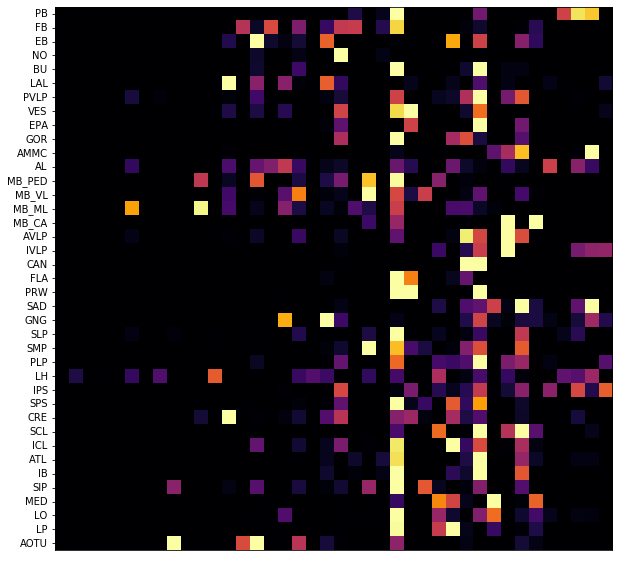

In [174]:
plt.figure(figsize=(10,10))
ax = plt.gca()
plt.imshow(np.nan_to_num(hist_stacked),vmin=0,vmax=.1,cmap='inferno')
#plt.axvline(10,color='grey',lw=3,linestyle='--')

##################
### ROI LABELS ###
##################
names = []
for name in full_left_group.values():
    if '_R' in name:
        names.append(name[:-2])
    else:
        names.append(name)
#names = names[::-1] #need to swap y-order
        
ax.set_yticks([i for i in np.arange(len(names))]);
ax.set_xticks([]);
ax.set_yticklabels(names);
plt.setp(ax.get_yticklabels(), x=0, rotation=0, ha="right", va='center', fontsize=10, rotation_mode="anchor");
plt.ylim(38.5,-.5)

# bar plot

In [179]:
# mean_time = []
# for roi in list(full_left_group.keys()):
#     ind = np.where(atlas_clean==roi)
#     mean_time.append(np.mean(brain[ind]))
# mean_time = np.asarray(mean_time)

In [209]:
# brainnan = brain.copy()
# brainnan[brain==0] = np.nan

In [37]:
##################
### ROI LABELS ###
##################
names = []
for name in full_left_group.values():
    if '_R' in name:
        names.append(name[:-2])
    else:
        names.append(name)
names = names[::-1] #need to swap y-order

In [45]:
mean_time = []
for roi in list(full_left_group.keys()):
    ind = np.where(atlas_clean==roi)
    mean_time.append(brain[ind])
mean_time = np.asarray(mean_time)

# remove 0s
for roi in range(39):
    mean_time[roi] = np.delete(mean_time[roi],np.where(mean_time[roi]==0)[0])
    
medians = []
for roi in range(39):
    medians.append(np.median(mean_time[roi]))
    
### FORCE IPS TO TOP (and GNG, AMMC)
medians[27] = 0
medians[22] = 1
medians[10] = 2
    
sorted_indicies = np.argsort(medians)
sorted_names = [names[::-1][i] for i in sorted_indicies]

sorted_indicies = sorted_indicies[::-1]
sorted_names = sorted_names[::-1]

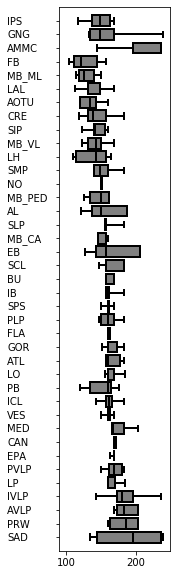

In [47]:
plt.figure(figsize=(2,10))
ax = plt.gca()
xs = list(range(0,39))

for k,roi in enumerate(sorted_indicies):
    bplot = ax.boxplot(mean_time[roi],positions=[xs[k]],whis=(10, 90),
                       showfliers=False,widths=.8,notch=False,patch_artist=True,vert=False,
       medianprops={"linewidth": 2,"solid_capstyle": "butt","color":'k'},
       boxprops={"linewidth": 2,"color":'k'},
       capprops={"linewidth": 2,"color":'k'},
       whiskerprops={"linewidth": 2,"color":'k'})
    bplot['boxes'][0].set_facecolor('grey')
ax.set_yticks(np.arange(len(full_left_group)));
ax.set_yticklabels(sorted_names,fontsize=10,ha='left',x=-.4);
plt.xlim(90,250)
plt.ylim(-1,39)

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, f'{timestr}')
plt.savefig(fname,dpi=300,bbox_inches='tight')

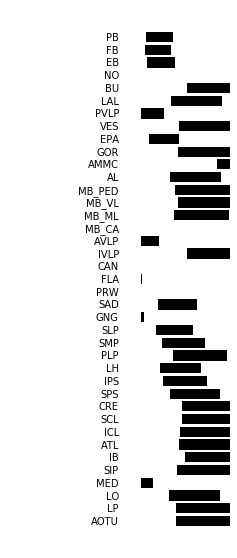

In [186]:
fig, ax = plt.subplots(1,2,figsize=(4,10));

#ax[0].barh(list(range(39))[::-1], mean_time,color='k')
ax[1].barh(list(range(39))[::-1], mean_time, left=mean_time-50, color='k')
#ax[0].invert_xaxis()
ax[0].axis('off')

##################
### ROI LABELS ###
##################
names = []
for name in full_left_group.values():
    if '_R' in name:
        names.append(name[:-2])
    else:
        names.append(name)
names = names[::-1] #need to swap y-order

ax[1].set_yticks(np.arange(len(full_left_group)));
ax[1].set_yticklabels(names,fontsize=10,ha='right',x=-.17);
ax[1].spines["right"].set_visible(False)
ax[1].spines["left"].set_visible(False)
ax[1].spines["top"].set_visible(False)
ax[1].spines["bottom"].set_visible(False)
ax[1].tick_params(width=0)
ax[1].set_xticks([])
plt.subplots_adjust(wspace=.5)

#ax[0].set_xlim(200,0)
ax[1].set_xlim(0,200)

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, f'{timestr}')
#plt.savefig(fname,dpi=300,bbox_inches='tight')